# 데이터 사이트

- AIhub

# 와인 품질 측정
- 데이터가 불균형한데 불균형한 것을 해소하기 위한 방법을 찾아보자

In [1]:
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore') # 워닝 메세지를 생략해줌

In [2]:
os.listdir('data')

['.DS_Store', '.ipynb_checkpoints', 'lyft_uber', 'winequalityN_imblance.csv']

In [3]:
wine = pd.read_csv('data/winequalityN_imblance.csv')

wine.head()

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality_range
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1


In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed_acidity         6487 non-null   float64
 2   volatile_acidity      6489 non-null   float64
 3   citric_acid           6494 non-null   float64
 4   residual_sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free_sulfur_dioxide   6497 non-null   float64
 7   total_sulfur_dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality_range         6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [5]:
wine = wine.dropna()

In [6]:
wine.isna().sum()
wine

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality_range
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,1
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,1
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,1
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,1
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,red,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,1
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,1
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,1


In [7]:
wine_type = pd.get_dummies(wine['type'], drop_first=True)

In [8]:
wine = pd.concat([wine.drop(['type'], axis=1), wine_type], axis=1)

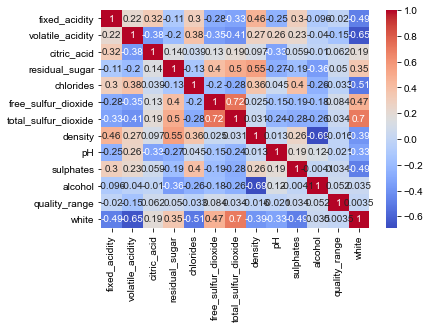

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(wine.corr(), annot=True, cmap="coolwarm")
sns.set(rc = {'figure.figsize':(30, 20)})
plt.show()

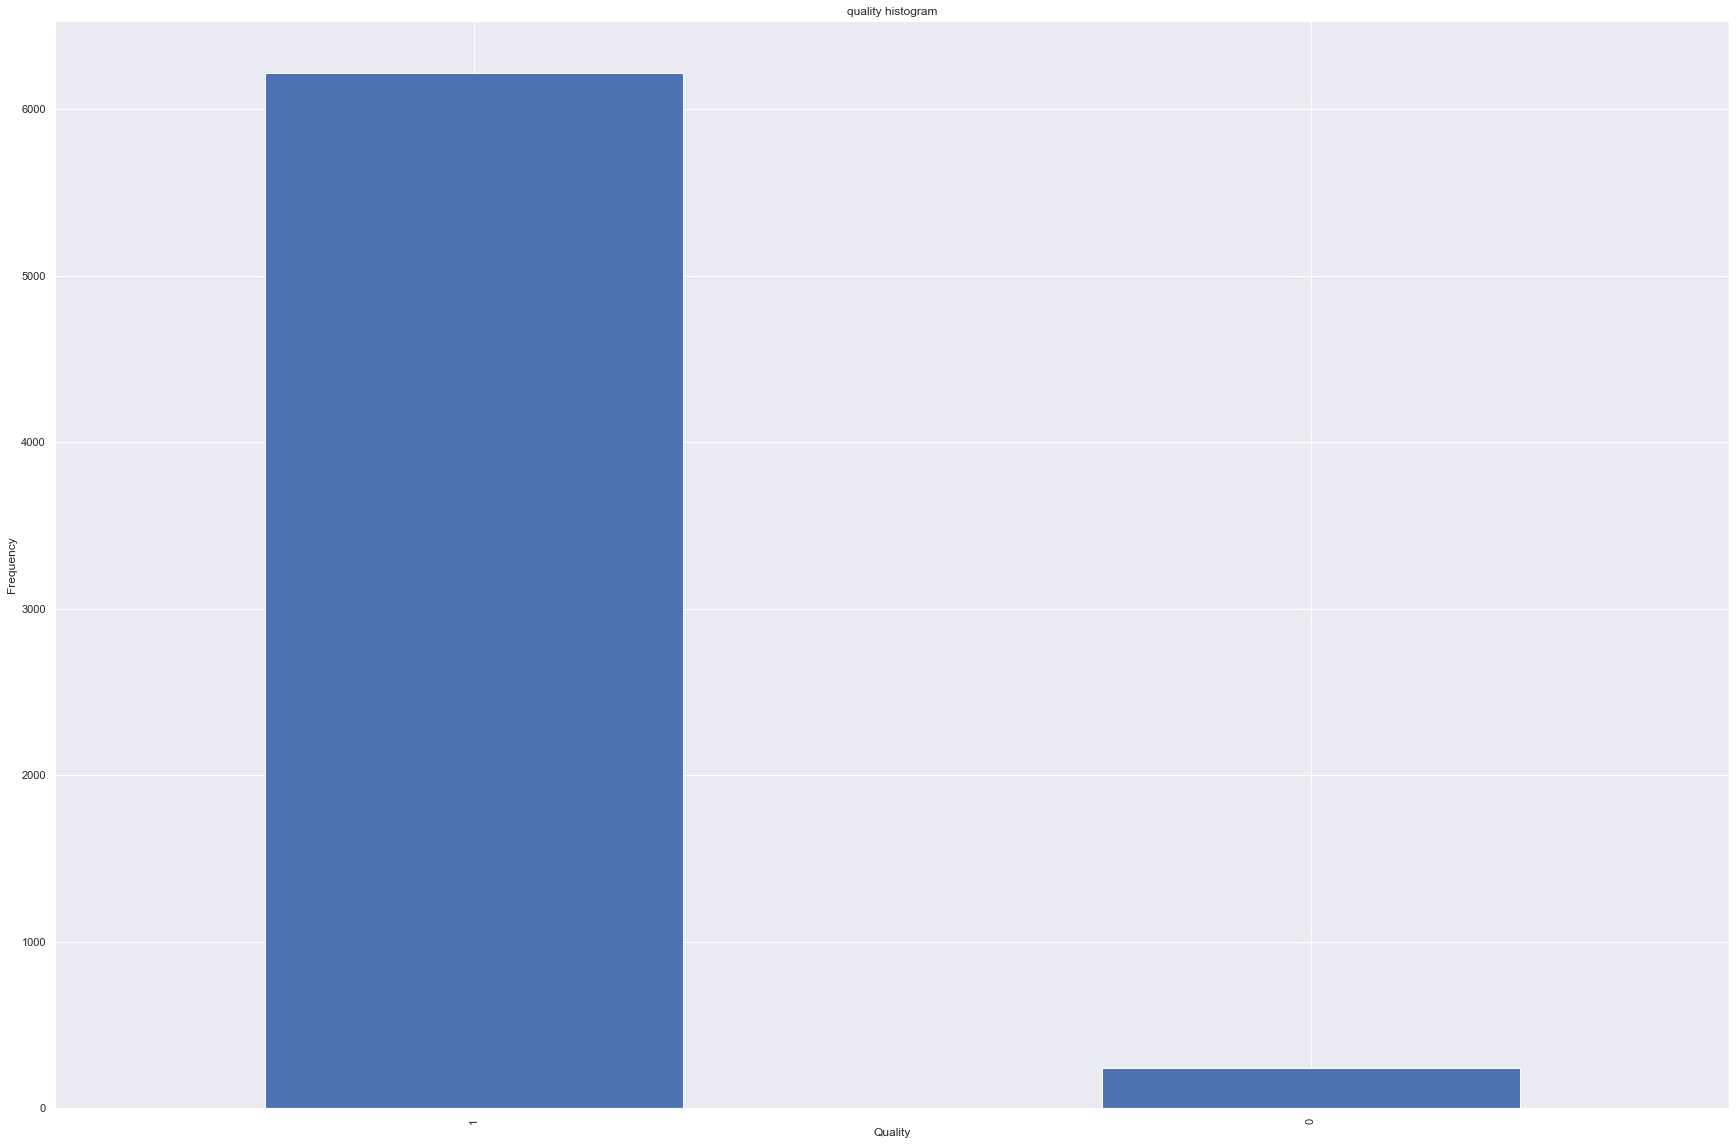

In [10]:
pd.value_counts(wine['quality_range']).plot.bar()
plt.title('quality histogram')
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.show()

In [11]:
wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality_range,white
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1,1


In [12]:
wine.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality_range,white
fixed_acidity,1.000000,0.221066,0.323744,-0.113442,0.299104,-0.283485,-0.330543,0.459713,-0.251121,0.301263,-0.096190,-0.020434,-0.488552
volatile_acidity,0.221066,1.000000,-0.377512,-0.196677,0.377995,-0.353402,-0.414729,0.272101,0.260134,0.225656,-0.039528,-0.151288,-0.653374
citric_acid,0.323744,-0.377512,1.000000,0.142324,0.039412,0.132271,0.194398,0.097068,-0.327860,0.059070,-0.010056,0.061912,0.185892
residual_sugar,-0.113442,-0.196677,0.142324,1.000000,-0.128814,0.403449,0.495684,0.551494,-0.266481,-0.185616,-0.359132,0.049721,0.349358
chlorides,0.299104,0.377995,0.039412,-0.128814,1.000000,-0.195428,-0.279602,0.363108,0.044653,0.396240,-0.257664,-0.033430,-0.512705
free_sulfur_dioxide,-0.283485,-0.353402,0.132271,0.403449,-0.195428,1.000000,0.721476,0.025113,-0.145164,-0.188947,-0.179477,0.083665,0.472653
total_sulfur_dioxide,-0.330543,-0.414729,0.194398,0.495684,-0.279602,0.721476,1.000000,0.031419,-0.237204,-0.275878,-0.264385,0.033622,0.700521
density,0.459713,0.272101,0.097068,0.551494,0.363108,0.025113,0.031419,1.000000,0.012525,0.260019,-0.687432,-0.015563,-0.391437
pH,-0.251121,0.260134,-0.327860,-0.266481,0.044653,-0.145164,-0.237204,0.012525,1.000000,0.190864,0.120473,-0.020704,-0.328474
sulphates,0.301263,0.225656,0.059070,-0.185616,0.396240,-0.188947,-0.275878,0.260019,0.190864,1.000000,-0.004116,0.033586,-0.486715


In [13]:
wine[['quality_range', 'pH', 'alcohol']].groupby(['quality_range'], as_index = True).count()

,pH,alcohol
quality_range,,
0,244,244
1,6219,6219


# Decision Tree 기법 사용

In [14]:
from sklearn.model_selection import train_test_split
X = wine[['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'white']]
y = wine['quality_range']
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.4, 
                                                    shuffle=False, 
                                                    random_state=100)
print("Shape of X_train: {}".format(X_train.shape))
print("Shape of y_train: {}".format(y_train.shape))
print("Shape of X_test: {}".format(X_test.shape))
print("Shape of y_test: {}".format(y_test.shape))

Shape of X_train: (3877, 12)
Shape of y_train: (3877,)
Shape of X_test: (2586, 12)
Shape of y_test: (2586,)


In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
depth = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for i in depth:
    DTC = DecisionTreeClassifier(criterion='gini', max_features=10, max_depth=i)
    DTC = DTC.fit(X_train, y_train)
    y_predict = DTC.predict(X_test)
    print('정확도 {0}: {1}'.format(i, metrics.accuracy_score(y_test, y_predict)))

정확도 1: 0.9659706109822119
정확도 2: 0.8437741686001546
정확도 3: 0.7358855375096675
정확도 4: 0.777262180974478
정확도 5: 0.7880897138437741
정확도 6: 0.8097447795823666
정확도 7: 0.7579273008507347
정확도 8: 0.7238979118329466
정확도 9: 0.6585460170146945
정확도 10: 0.680201082753287


# 전처리 없이 imbalance 한 상태로 모델링

In [16]:
wine.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality_range', 'white'],
      dtype='object')

In [17]:
feature_cols = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'white']
X = wine[feature_cols]
y = wine['quality_range']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

In [18]:
wine.isna().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality_range           0
white                   0
dtype: int64

In [19]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=1000)
logreg.fit(X_train, y_train)
print(list(zip(feature_cols, logreg.coef_[0])))

[('fixed_acidity', -0.1724268595728503), ('volatile_acidity', -5.473068499095968), ('citric_acid', 1.5821832935250426), ('residual_sugar', 0.06314304490048692), ('chlorides', 0.10884891705666072), ('free_sulfur_dioxide', 0.020640338638975426), ('total_sulfur_dioxide', 0.0023474165720562346), ('density', 0.3821501847103365), ('pH', 0.20520888681420082), ('sulphates', 1.4122591369728756), ('alcohol', 0.4683588867762852), ('white', -2.662385402681073)]


In [20]:
print(logreg.coef_)
print(logreg.coef_[0])

[[-1.72426860e-01 -5.47306850e+00  1.58218329e+00  6.31430449e-02
   1.08848917e-01  2.06403386e-02  2.34741657e-03  3.82150185e-01
   2.05208887e-01  1.41225914e+00  4.68358887e-01 -2.66238540e+00]]
[-1.72426860e-01 -5.47306850e+00  1.58218329e+00  6.31430449e-02
  1.08848917e-01  2.06403386e-02  2.34741657e-03  3.82150185e-01
  2.05208887e-01  1.41225914e+00  4.68358887e-01 -2.66238540e+00]


In [21]:
y_pred_class = logreg.predict(X_test)

In [22]:
y_pred_prob = logreg.predict_proba(X_test)

In [23]:
y_pred_prob

array([[0.01024001, 0.98975999],
       [0.03618669, 0.96381331],
       [0.32675772, 0.67324228],
       ...,
       [0.03026667, 0.96973333],
       [0.01022175, 0.98977825],
       [0.11767563, 0.88232437]])

In [24]:
# calculate classification accuracy
from sklearn import metrics

print(metrics.accuracy_score(y_test, y_pred_class))

0.9647277227722773


# Oversampling기법

- undersampling기법은 잘 사용하지 않는 편이다.
- oversampling기법으로는 SMOTE방법이 있다

- 내가 측정한 정확도가 오버피팅되었는지 알 수 있는 방법? --> validation set과 training set을 동시에 확인하는 것이 좋다
- 새로운 데이터를 여러개 넣어보고 정확도나 rmse를 확인하는 것이 좋다

In [26]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (4847, 12) (4847,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (9320, 12) (9320,)
SMOTE 적용 후 레이블 값 분포: 
 0    4660
1    4660
Name: quality_range, dtype: int64


In [29]:
y = wine['quality_range']
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.4, 
                                                    shuffle=False, 
                                                    random_state=100)
print("Shape of X_train: {}".format(X_train.shape))
print("Shape of y_train: {}".format(y_train.shape))
print("Shape of X_test: {}".format(X_test.shape))
print("Shape of y_test: {}".format(y_test.shape))

Shape of X_train: (3877, 12)
Shape of y_train: (3877,)
Shape of X_test: (2586, 12)
Shape of y_test: (2586,)


In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
depth = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for i in depth:
    DTC = DecisionTreeClassifier(criterion='gini', max_features=10, max_depth=i)
    DTC = DTC.fit(X_train, y_train)
    y_predict = DTC.predict(X_test)
    print('정확도 {0}: {1}'.format(i, metrics.accuracy_score(y_test, y_predict)))

정확도 1: 0.9659706109822119
정확도 2: 0.8437741686001546
정확도 3: 0.7382057231245166
정확도 4: 0.7331786542923434
정확도 5: 0.7037896365042536
정확도 6: 0.771461716937355
정확도 7: 0.7563805104408353
정확도 8: 0.742846094354215
정확도 9: 0.7273781902552204
정확도 10: 0.6438515081206496
